## Ensemble Techniques And Its Types-4

In [1]:
import seaborn as sns
import pandas as pd

In [2]:
df=pd.read_csv('dataset.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df.isnull().sum()


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Separating x and y variables

In [7]:
x=df.drop(labels=['target'],axis=1)
y=df[['target']]

In [8]:
y.value_counts()

target
1         165
0         138
dtype: int64

### splitting the dataset into training set and test set

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.3)

In [11]:
x_train.shape


(212, 13)

In [12]:
x_test.shape

(91, 13)

In [13]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=100,max_depth=10)
rfc.fit(x_train,y_train.values.flatten())

RandomForestClassifier(max_depth=10)

In [14]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

In [15]:
def evaluate_model(x,y,model):
    y_pred=model.predict(x)
    acc=accuracy_score(y,y_pred)
    pre=precision_score(y,y_pred)
    recall=recall_score(y,y_pred)
    f1=f1_score(y,y_pred)
    print(f'Accuracy score : {acc:.4f}')
    print(f'Precision score : {pre:.4f}')
    print(f'Recall score : {recall:.4f}')
    print(f'F1 score : {f1:.4f}') 
    
    return acc , pre,recall,f1

In [16]:
acc_base, pre_base, rec_base, f1_base = evaluate_model(x_test, y_test, rfc)

Accuracy score : 0.8242
Precision score : 0.8400
Recall score : 0.8400
F1 score : 0.8400


In [17]:
from sklearn.metrics import classification_report
y_predtest=rfc.predict(x_test)
print(classification_report(y_test,y_predtest))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80        41
           1       0.84      0.84      0.84        50

    accuracy                           0.82        91
   macro avg       0.82      0.82      0.82        91
weighted avg       0.82      0.82      0.82        91



<AxesSubplot: >

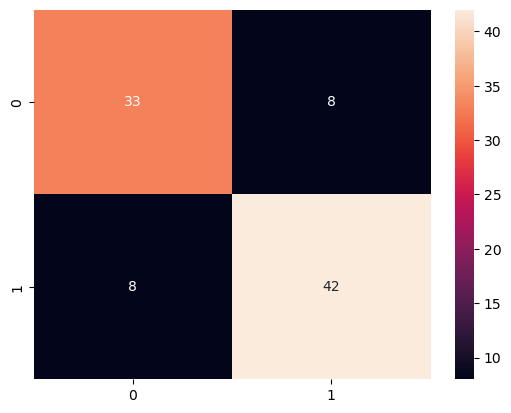

In [18]:
from sklearn.metrics import confusion_matrix
cf=confusion_matrix(y_test,y_predtest)
import seaborn as sns
sns.heatmap(cf,annot=True,fmt='d')

In [19]:
rfc.feature_importances_

array([0.07767089, 0.03280345, 0.13517213, 0.0706579 , 0.07228076,
       0.0141013 , 0.02044406, 0.10232608, 0.07724774, 0.10617498,
       0.0531823 , 0.14671298, 0.09122543])

In [20]:
rfc.feature_names_in_

array(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
       'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal'], dtype=object)

In [21]:
imp=pd.Series(rfc.feature_importances_)
imp.index=rfc.feature_names_in_
imp=imp.sort_values(ascending=False)
imp

ca          0.146713
cp          0.135172
oldpeak     0.106175
thalach     0.102326
thal        0.091225
age         0.077671
exang       0.077248
chol        0.072281
trestbps    0.070658
slope       0.053182
sex         0.032803
restecg     0.020444
fbs         0.014101
dtype: float64

In [22]:
top5=list(imp[:5].index)
print(f'top 5 features in the data are {top5}')


top 5 features in the data are ['ca', 'cp', 'oldpeak', 'thalach', 'thal']


<AxesSubplot: >

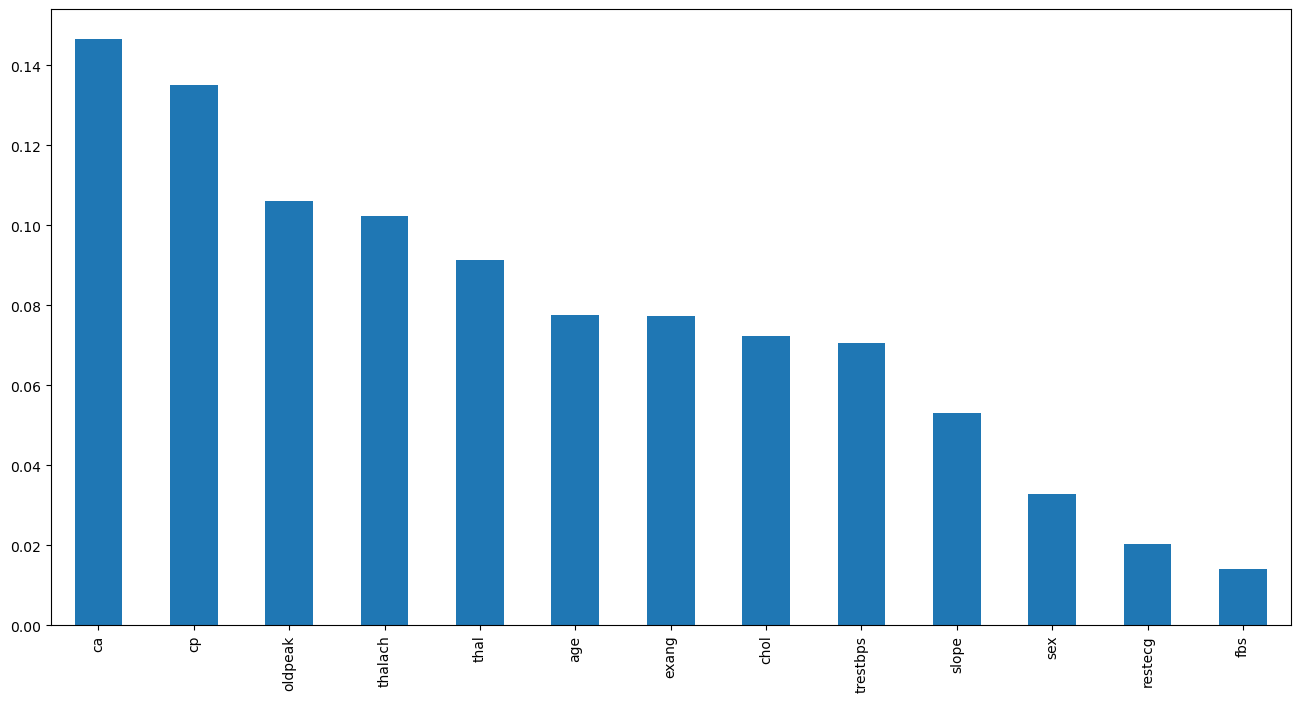

In [23]:
imp.plot(kind='bar',figsize=(16,8))

In [27]:
# Defining the parameters for tuning
parameters = {
    'n_estimators':[10,50,100,200,300,400],
    'max_depth':[4,5,6,7,8,9,10],
    'min_samples_leaf':[2,3,4,5,6],
    'min_samples_split':[2,5,10]
}

In [28]:
#performing random search cv
from sklearn.model_selection import RandomizedSearchCV
rscv=RandomizedSearchCV(RandomForestClassifier(),param_distributions=parameters,cv=5,n_iter=50,verbose=3,scoring='f1')

In [29]:
rscv.fit(x_train,y_train.values.flatten())

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV 1/5] END max_depth=6, min_samples_leaf=2, min_samples_split=10, n_estimators=200;, score=0.884 total time=   0.4s
[CV 2/5] END max_depth=6, min_samples_leaf=2, min_samples_split=10, n_estimators=200;, score=0.880 total time=   0.4s
[CV 3/5] END max_depth=6, min_samples_leaf=2, min_samples_split=10, n_estimators=200;, score=0.731 total time=   0.4s
[CV 4/5] END max_depth=6, min_samples_leaf=2, min_samples_split=10, n_estimators=200;, score=0.917 total time=   0.4s
[CV 5/5] END max_depth=6, min_samples_leaf=2, min_samples_split=10, n_estimators=200;, score=0.773 total time=   0.4s
[CV 1/5] END max_depth=9, min_samples_leaf=2, min_samples_split=10, n_estimators=400;, score=0.864 total time=   0.8s
[CV 2/5] END max_depth=9, min_samples_leaf=2, min_samples_split=10, n_estimators=400;, score=0.880 total time=   0.8s
[CV 3/5] END max_depth=9, min_samples_leaf=2, min_samples_split=10, n_estimators=400;, score=0.760 total time=  

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=50,
                   param_distributions={'max_depth': [4, 5, 6, 7, 8, 9, 10],
                                        'min_samples_leaf': [2, 3, 4, 5, 6],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [10, 50, 100, 200, 300,
                                                         400]},
                   scoring='f1', verbose=3)

In [30]:
rscv.best_params_

{'n_estimators': 50,
 'min_samples_split': 10,
 'min_samples_leaf': 5,
 'max_depth': 8}

In [31]:
best_rfc=rscv.best_estimator_
best_rfc

RandomForestClassifier(max_depth=8, min_samples_leaf=5, min_samples_split=10,
                       n_estimators=50)

In [32]:
imp_tuned=best_rfc.feature_importances_
imp_tuned=pd.Series(imp_tuned)
imp_tuned.index=best_rfc.feature_names_in_
imp_tuned=imp_tuned.sort_values(ascending=False)
imp_tuned

thal        0.173956
ca          0.169246
cp          0.122461
exang       0.101457
oldpeak     0.093434
thalach     0.091864
age         0.065241
slope       0.050987
trestbps    0.044338
sex         0.037119
chol        0.034681
restecg     0.011432
fbs         0.003784
dtype: float64

In [33]:
imp_tuned[:2]

thal    0.173956
ca      0.169246
dtype: float64

<AxesSubplot: >

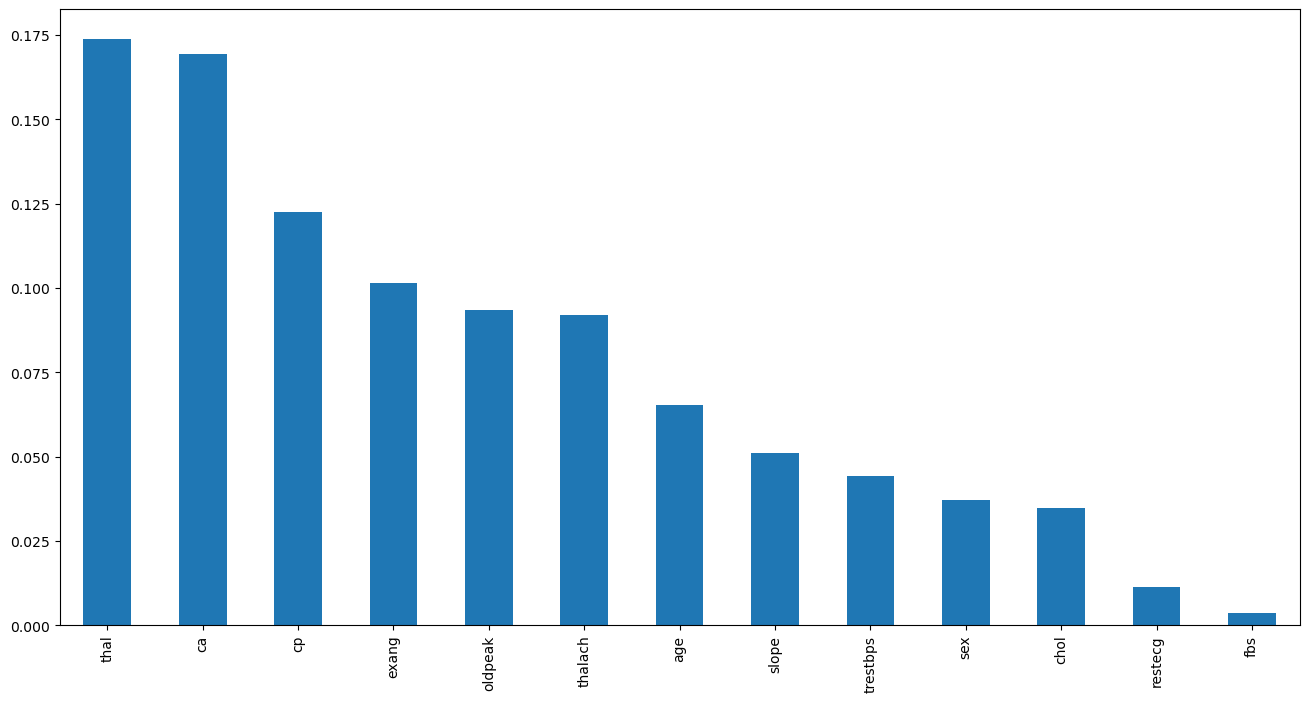

In [34]:
imp_tuned.plot(kind='bar',figsize=(16,8))

In [36]:
top2=x_train[['thal','ca']]
top2.head()

,thal,ca
124,2,0
72,2,0
15,2,0
10,2,0
163,2,4


In [37]:
df_top2 =pd.concat([top2,y_train],axis=1)
df_top2.head()

,thal,ca,target
124,2,0,1
72,2,0,1
15,2,0,1
10,2,0,1
163,2,4,1


In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(data=df_top2,x='thal',y='ca',hue='target')
plt.title('Actual Class Target plot')
plt.show()

ValueError: Could not interpret value `cp` for parameter `y`